# Boston Housing Regression Tree

<div style="text-align: center; 
    line-height: 48px;
    font-size: 24px; " >  
    Boston Housing Linear Regression<br>
    Mike Mattinson<br>
    Master of Science, Data Analytics, WGU.edu<br>
    Task 1 - Linear Regression<br>
    September 12, 2021<br>
</div>

<div style="font-family:Impact;">Configure Notebook.<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Import and configure packages. All of the code for importing and configuring is contained in a imports .PY file. Also, there is a second helpers .PY file to define a few functions used throughout this notebook.</span></div>

In [1]:
# import and configure packages
from imports import *
%matplotlib inline
warnings.filterwarnings('ignore')

P:\code\wgu\py39\Scripts\python.exe
python version: 3.9.7
pandas version: 1.3.0
numpy version: 1.19.5
scipy version: 1.7.1
sklearn version: 1.0.1
matplotlib version: 3.4.2
seaborn version: 0.11.2
graphviz version: 0.17


In [2]:
from helpers import *

getFilename version: 1.0
saveTable version: 1.0
describeData version: 1.0
createScatter version: 1.0
createBarplot version: 1.1
get_unique_numbers version: 1.0
createCorrelationMatrix version: 1.0
createStackedHistogram version: 1.1


## Ask the Right Questions

## Collect Data

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

### Describe Data

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 2-1.<span style="font-weight: normal;">DESCRIPTION OF DATA IN BOSTON HOUSING DATASET</span></div>

### Raw Data

In [3]:
# define raw data from .csv file
raw = pd.read_csv('data/boston.csv')
raw = raw.drop(['ident'], axis=1)

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 2-2.<span style="font-weight: normal;">RAW DATA</span></div>Initial state of dataset before any manipulations.

In [4]:
saveTable(data=raw, title='RAW', sect='XX', 
    course='BOS', caption='2 2')

,0,1,2,3
crim,0.006,0.027,0.027,0.032
zn,18.000,0.000,0.000,0.000
indus,2.310,7.070,7.070,2.180
chas,0.000,0.000,0.000,0.000
nox,0.538,0.469,0.469,0.458
rm,6.575,6.421,7.185,6.998
age,65.200,78.900,61.100,45.800
dis,4.090,4.967,4.967,6.062
rad,1.000,2.000,2.000,3.000
tax,296.000,242.000,242.000,222.000


shape: (506, 14)
Table saved to: TABLES/BOS_TASK1_XX_TAB_2_2_RAW.CSV


<h2>Prepare Data</h2>
Removing major errors, duplicates, and outliers.
Removing unwanted data.
Bringing structure to data.
Filling in missing data and gaps.

In [5]:
# start with a copy of raw data
clean = raw.copy()

### Missing Data

### Duplicate Data

### Outliers

### Mitigation

<h3>Custom Data</h3>
Custom data.
Calculated values.

In [6]:
# define new categorical variable
ave = clean['medv'].mean()
print('Average home value: ${:.1f}K'.format(ave))
clean['value'] = np.where(clean['medv']>ave, 'Above', 'Below')

Average home value: $22.5K


<h3>Clean Data</h3>Final state of the data ready to be explored and analyzed.

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 3-1.<span style="font-weight: normal;">CLEAN DATA</span></div>Clean data ready to be analyzed.

In [7]:
saveTable(data=clean, title='CLEAN', sect='XX', 
    course='BOS', caption='3 1')

,0,1,2,3
crim,0.006,0.027,0.027,0.032
zn,18.0,0.0,0.0,0.0
indus,2.31,7.07,7.07,2.18
chas,0,0,0,0
nox,0.538,0.469,0.469,0.458
rm,6.575,6.421,7.185,6.998
age,65.2,78.9,61.1,45.8
dis,4.09,4.967,4.967,6.062
rad,1,2,2,3
tax,296,242,242,222


shape: (506, 15)
Table saved to: TABLES/BOS_TASK1_XX_TAB_3_1_CLEAN.CSV


<h2>Explore Data</h2>
Data visualization.

### Define Data

<h3>Describe Data</h3>
Describe data as either Continuous or Categorical data.

In [8]:
# identify initial set of feature (X) and target (y) data
describeData(data=clean)


1. crim is numerical (CONTINUOUS) - type: float64.
  Min: 0.006  Max: 88.976  Std: 8.602

2. zn is numerical (CONTINUOUS) - type: float64.
  Min: 0.000  Max: 100.000  Std: 23.322

3. indus is numerical (CONTINUOUS) - type: float64.
  Min: 0.460  Max: 27.740  Std: 6.860

4. chas is numerical (CONTINUOUS) - type: int64.
  Unique: [0, 1]

5. nox is numerical (CONTINUOUS) - type: float64.
  Min: 0.385  Max: 0.871  Std: 0.116

6. rm is numerical (CONTINUOUS) - type: float64.
  Min: 3.561  Max: 8.780  Std: 0.703

7. age is numerical (CONTINUOUS) - type: float64.
  Min: 2.900  Max: 100.000  Std: 28.149

8. dis is numerical (CONTINUOUS) - type: float64.
  Min: 1.130  Max: 12.127  Std: 2.106

9. rad is numerical (CONTINUOUS) - type: int64.
  Unique: [1, 2, 3, 4, 5, 6, 7, 8, 24]

10. tax is numerical (CONTINUOUS) - type: int64.
  Unique: [256, 384, 391, 264, 265, 398, 270, 273, 402, 403, 276, 277, 279, 280, 281, 666, 411, 284, 285, 287, 289, 293, 422, 296, 300, 430, 432, 305, 304, 307, 437, 311

<h3>Scatter Plots Using Pandas</h3>
This scatter plot is created using Pandas.

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">FIGURE 4-1.<span style="font-weight: normal;">SCATTER PLOTS</span></div>Scatter plot using Pandas.

<AxesSubplot:xlabel='crim', ylabel='medv'>

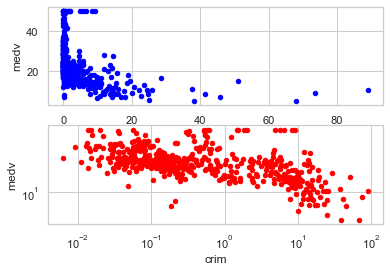

In [9]:
fig, (ax1,ax2) = plt.subplots(2, 1)
clean.plot.scatter(x='crim', y='medv', legend=False, 
            c='blue', ax=ax1)
clean.plot.scatter(x='crim', y='medv', legend=False, 
            c='red', logx=True, logy=True, ax=ax2)


<h3>Scatter Plot Using Matplotlib</h3>
This scatter plot is created using Matplotlib.

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">FIGURE 4-2.<span style="font-weight: normal;">SCATTER PLOTS</span></div>Scatter plot using Matplotlib.

Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_2_SCATTER_PLOT_CRIM_MEDV.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_2_SCATTER_PLOT_ZN_MEDV.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_2_SCATTER_PLOT_INDUS_MEDV.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_2_SCATTER_PLOT_CHAS_MEDV.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_2_SCATTER_PLOT_NOX_MEDV.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_2_SCATTER_PLOT_RM_MEDV.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_2_SCATTER_PLOT_AGE_MEDV.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_2_SCATTER_PLOT_DIS_MEDV.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_2_SCATTER_PLOT_RAD_MEDV.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_2_SCATTER_PLOT_TAX_MEDV.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_2_SCATTER_PLOT_PTRATIO_MEDV.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_2_SCATTER_PLOT_BLACK_MEDV.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_2_SCATTER_PLOT_LSTAT_MEDV.PNG


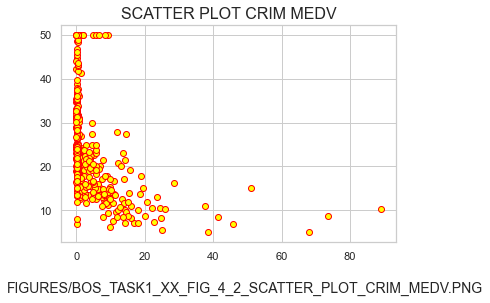

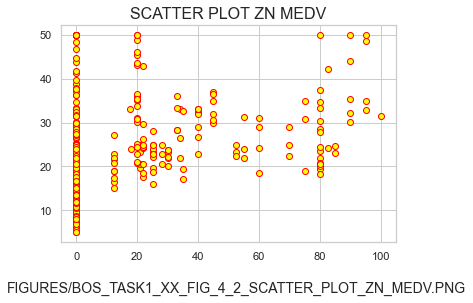

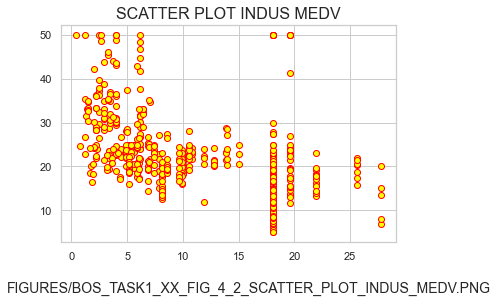

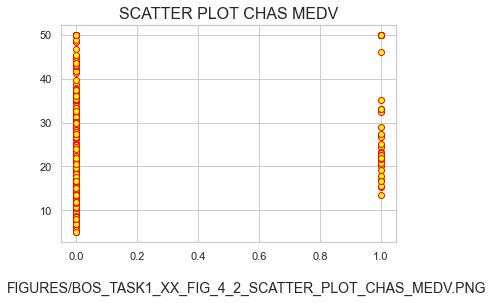

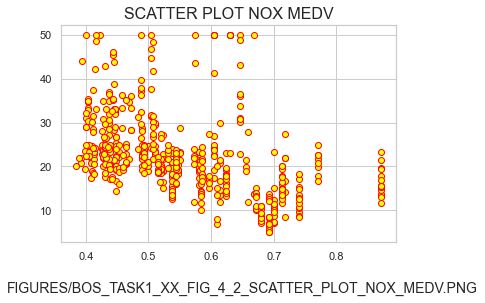

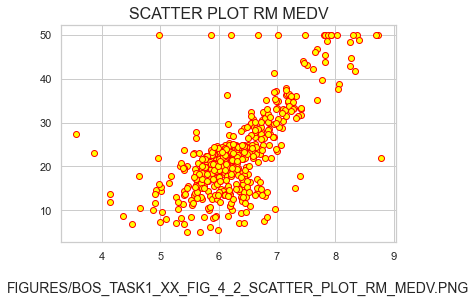

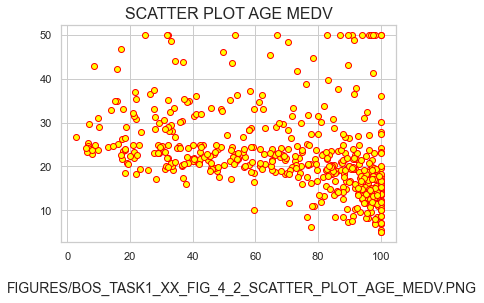

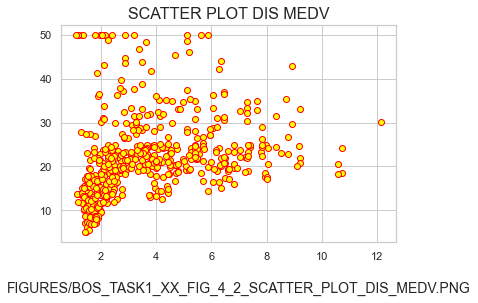

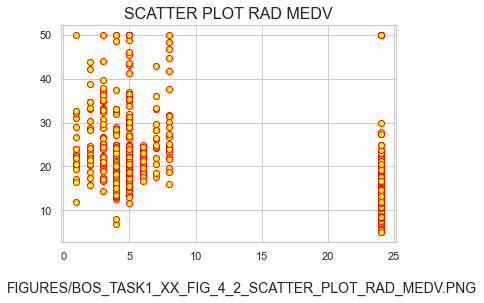

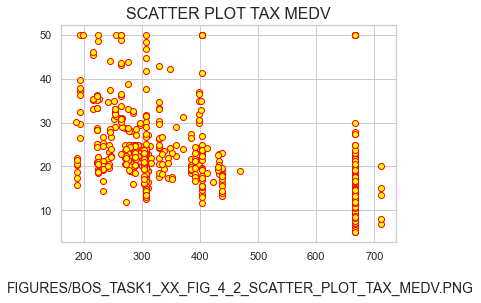

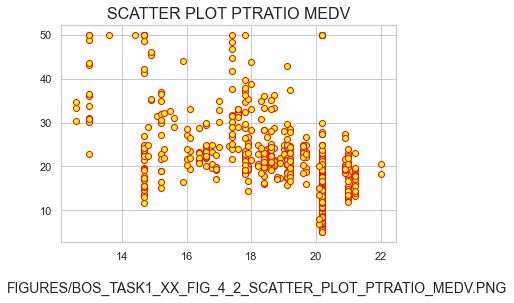

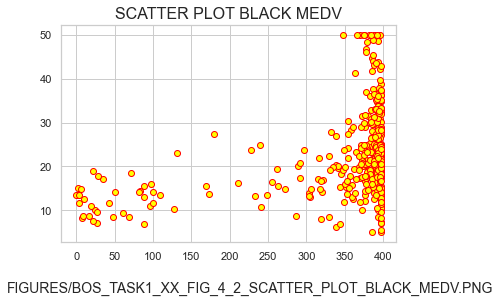

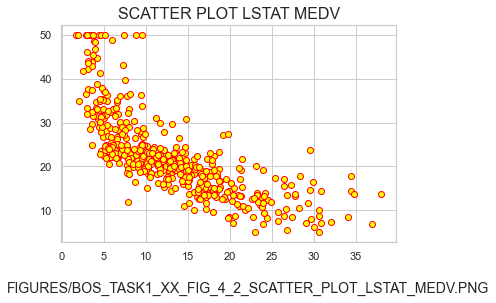

In [10]:
# create scatter plot
target= 'medv'
drop=['value'] # list of columns to drop
X = clean.drop(columns=[target]+drop) # feature data
for fea in X.columns.to_numpy():
    if fea not in [target, 'value']:
        createScatter(data=clean, feature=fea, 
            target=target, c='yellow', edgecolor='red',
            title='Scatter plot', caption='4 2', 
            course='BOS', task='Task1')

<h3>Bar Chart for Target Grouped by Categorical Feature </h3>
This bar plot is created using Matplotlib.

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">FIGURE 4-3.<span style="font-weight: normal;">Bar Chart for Target Grouped by Categorical Feature</span></div>The feature 'chas' is actually a binary integer of values [0,1]. But, this should/would work the same for any other categorical feature.

Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_3_BAR_PLOT_CHAS_MEDV.PNG


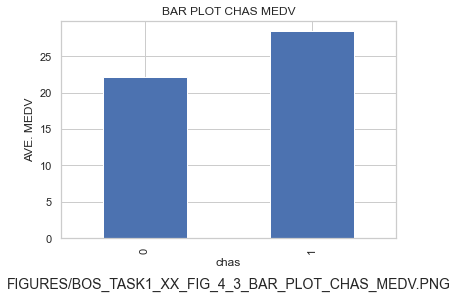

In [11]:
# create bar plots using pandas
createBarplot(data=clean, feature='chas', target='medv',
        title='bar plot', caption='4 3', 
        course='BOS', task = 'Task1')

Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_3_BAR_PLOT_RAD_MEDV.PNG


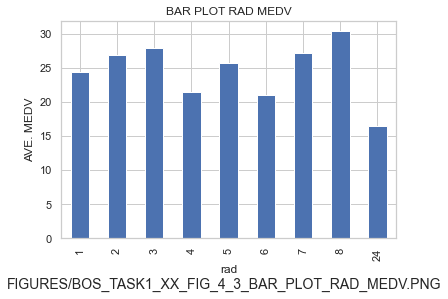

In [12]:
# for example, same plot for rad that has nine (9) unique values
createBarplot(data=clean, feature='rad', target='medv',
        title='bar plot', caption='4 3', 
        course='BOS', task = 'Task1')

<h3>Correlation Matrix</h3>
Create correlation matrix using seaborn and matplotlib.

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">FIGURE 4-x.<span style="font-weight: normal;">Correlation Matrix</span></div>Create correlation matrix using seaborn and matplotlib.

Figure saved to: FIGURES/BOS_TASK1_XX_FIG_4_X_CORRELATION_MATRIX.PNG


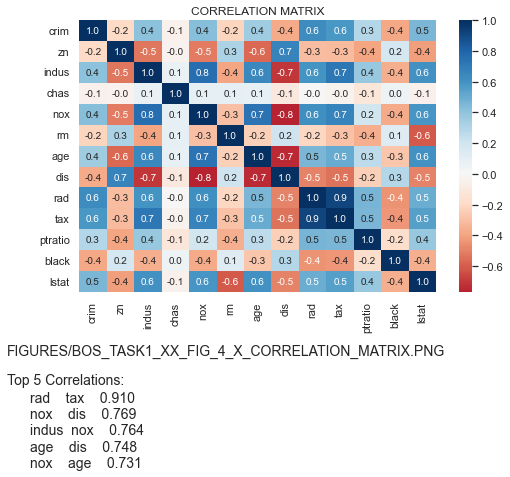

In [13]:
# create correlation matrix of feature data
X = clean.drop(columns=['medv','value'])
createCorrelationMatrix(data=X, 
        title='correlation matrix', caption='4 X', 
        course='BOS', task = 'Task1', highest=5)

<h3>Stacked Histogram Above/Below Ave. MEDV</h3>This will create plots for each numeric feature. Orange is below Ave. MEDV. Blue is above Ave. MEDV.

In [14]:
# define target and features
target= 'value' # target data
drop=['medv'] # list of columns to drop
X = clean.drop(columns=[target]+drop) # feature data
y = pd.DataFrame(clean[target]) # target data
print('Feature (X) data type: {}'.format(type(X)))
print('Target (y) data type: {}'.format(type(y)))

Feature (X) data type: <class 'pandas.core.frame.DataFrame'>
Target (y) data type: <class 'pandas.core.frame.DataFrame'>


Figure saved to: FIGURES/BOS_TASK1_XX_FIG_X_X_STACKED_HISTOGRAM_CRIM_VALUE.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_X_X_STACKED_HISTOGRAM_ZN_VALUE.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_X_X_STACKED_HISTOGRAM_INDUS_VALUE.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_X_X_STACKED_HISTOGRAM_CHAS_VALUE.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_X_X_STACKED_HISTOGRAM_NOX_VALUE.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_X_X_STACKED_HISTOGRAM_RM_VALUE.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_X_X_STACKED_HISTOGRAM_AGE_VALUE.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_X_X_STACKED_HISTOGRAM_DIS_VALUE.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_X_X_STACKED_HISTOGRAM_RAD_VALUE.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_X_X_STACKED_HISTOGRAM_TAX_VALUE.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_X_X_STACKED_HISTOGRAM_PTRATIO_VALUE.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_X_X_STACKED_HISTOGRAM_BLACK_VALUE.PNG
Figure saved to: FIGURES/BOS_TASK1_XX_FIG_X_X_STACKED_HI

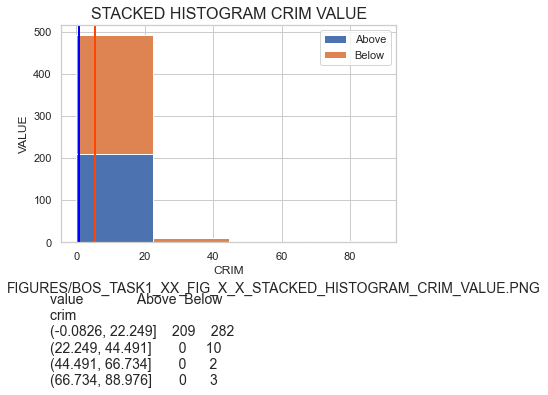

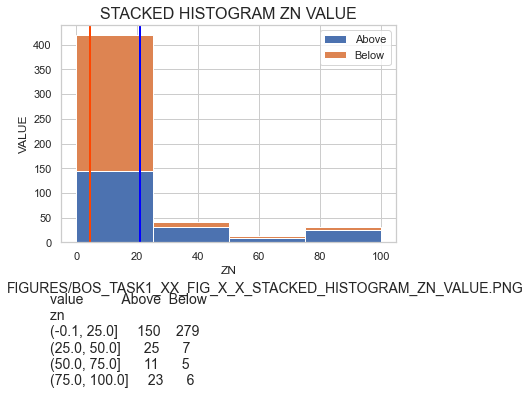

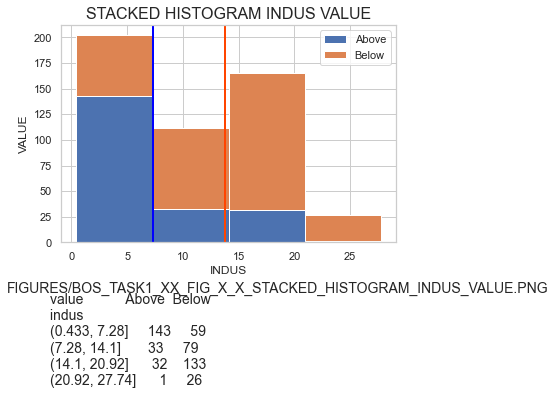

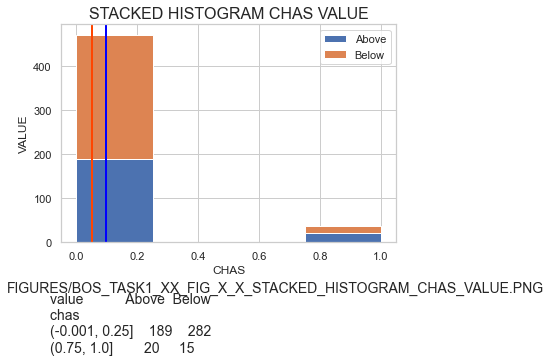

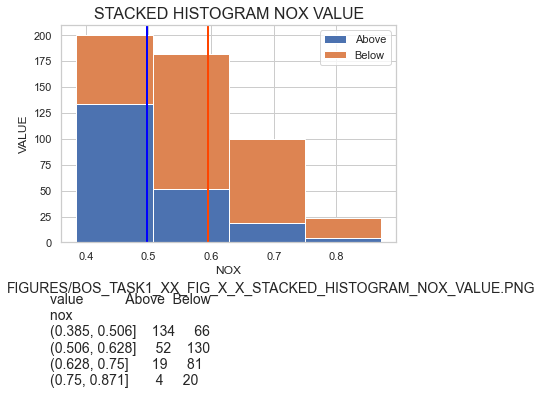

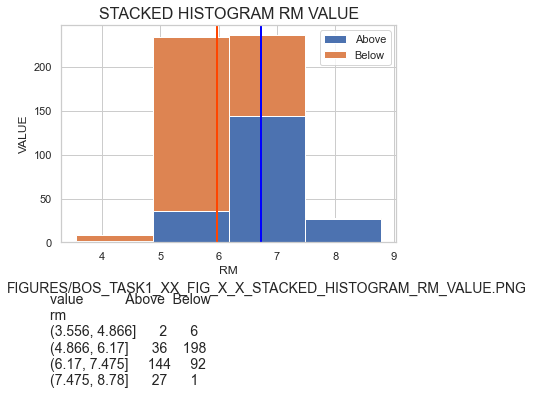

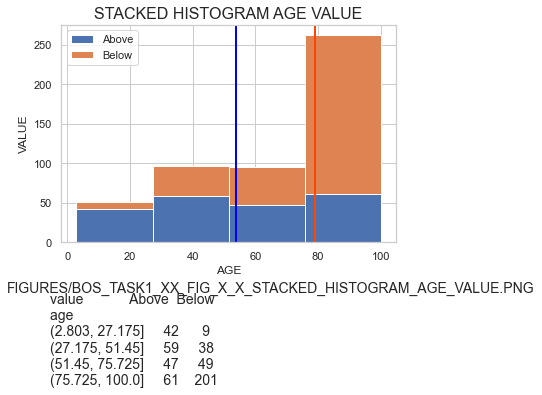

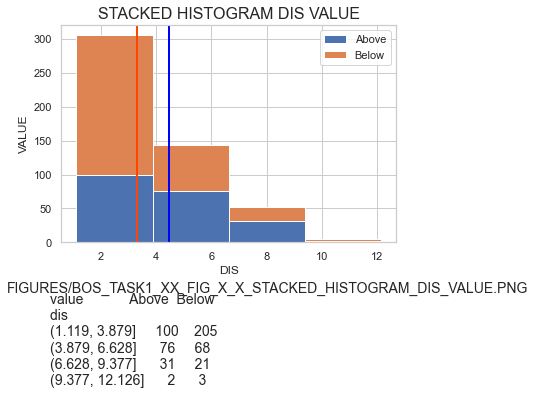

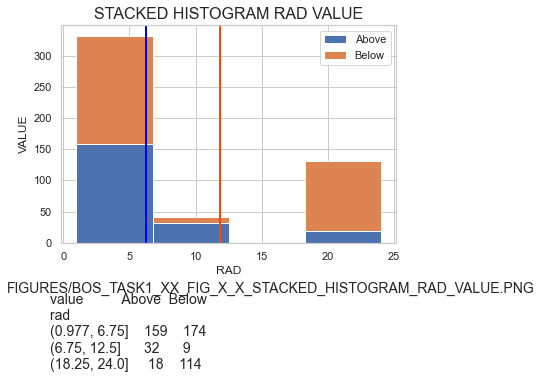

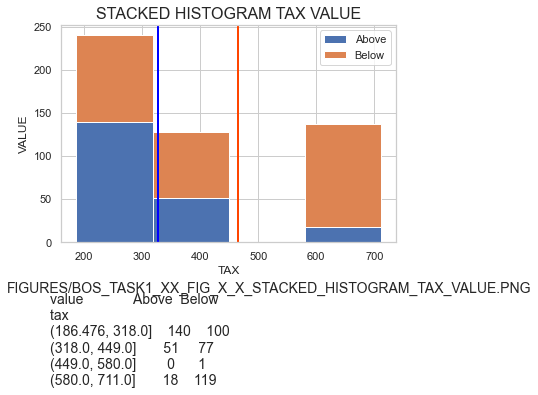

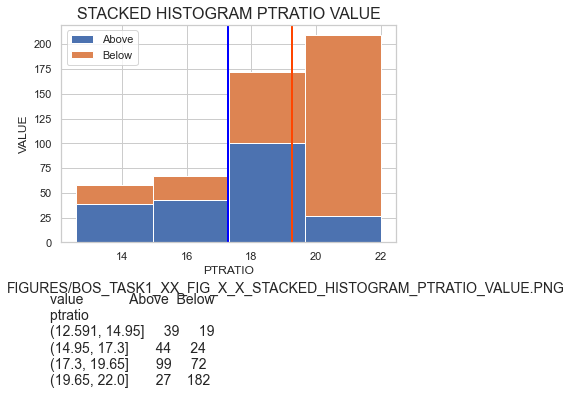

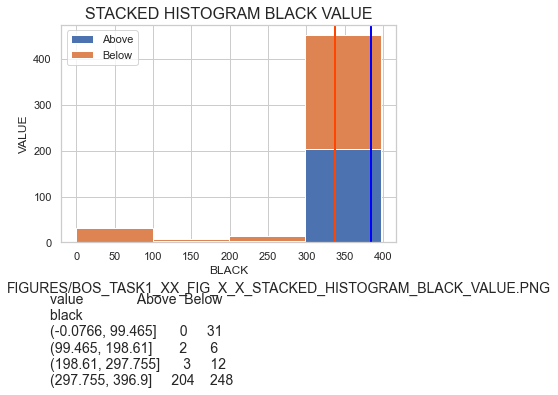

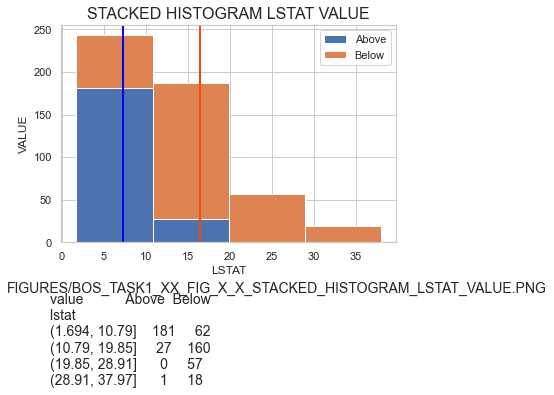

In [15]:
# create plot for each feature
for fea in X.columns.to_numpy():
    createStackedHistogram(data=clean, target='value',feature=fea,
        task='Task1', course='BOS', caption='x x',
        title='Stacked Histogram', bins=4, values='AboveBelow')

<h2>Analyze Data</h2>
Descriptive analysis, what has already happened. 
Diagnostic analysis, understand why something has happened.
Predictive analysis, identify future trends based on historical data.
Prescriptive analysis, make recommendations for future data.

### Descriptive Analysis

### Diagnostic Analysis

<h3>Predictive Analysis</h3>
Identify future trends based on historical data.

#### Classification Tree

In [16]:
# define target and features
target= 'value' # target data
drop=['medv'] # list of columns to drop
X = clean.drop(columns=[target]+drop) # feature data
y = pd.DataFrame(clean[target]) # target data
print('Feature (X) data type: {}'.format(type(X)))
print('Target (y) data type: {}'.format(type(y)))

Feature (X) data type: <class 'pandas.core.frame.DataFrame'>
Target (y) data type: <class 'pandas.core.frame.DataFrame'>


In [17]:
# split data into training and test data
tts = train_test_split(X, y, test_size=0.3, random_state=13)
(X_train, X_test, y_train, y_test)=tts
print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (354, 13)
y_train: (354, 1)
X_test: (152, 13)
y_test: (152, 1)


In [18]:
# create model
dt = DecisionTreeClassifier(max_depth=2, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

Target: [value: Above, Below]


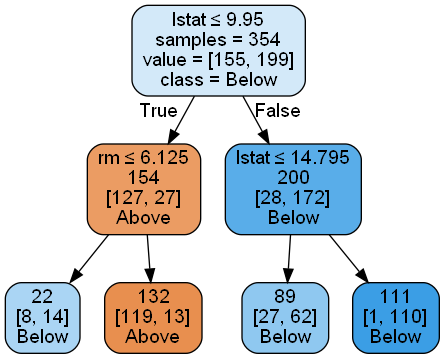

In [19]:
# visualize model
print('Target: [{}: {}]'.format(target, ', '.join(dt.classes_)))
plotDecisionTree(dt, feature_names=X_train.columns.to_list(),
            class_names=dt.classes_)

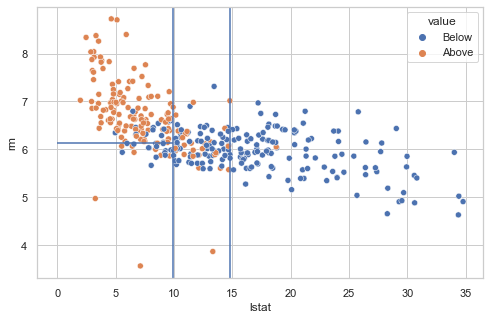

In [20]:
# plot decision boundaries
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.scatterplot(x="lstat", y="rm", hue=target, 
    data=y_train.merge(X_train, left_index=True, right_index=True))
ax.axvline(x=9.95) # full vert line
ax.axvline(x=14.795)
ax.hlines(y=6.125, xmin=0, xmax=9.95) # horizontal line segment
#ax.hlines(y=19.8, xmin=59.7, xmax=110) # horizontal line segment
#ax.vlines(x=12.0, ymin=13, ymax=20.6) # vert line segment
#ax.vlines(x=61.5, ymin=13, ymax=19.8) # vert line segment

In [21]:
# training summary
classificationSummary(y_train, dt.predict(X_train))

Confusion Matrix (Accuracy 0.8616)

       Prediction
Actual   0   1
     0 119  36
     1  13 186


In [22]:
# test summary
classificationSummary(y_test, dt.predict(X_test))

Confusion Matrix (Accuracy 0.9211)

       Prediction
Actual  0  1
     0 45  9
     1  3 95


#### Regression Tree

In [23]:
# define target and features
target= 'medv' # target data
drop=['value'] # list of columns to drop
X = clean.drop(columns=[target]+drop) # feature data
y = pd.DataFrame(clean[target]) # target data
print('Feature (X) data type: {}'.format(type(X)))
print('Target (y) data type: {}'.format(type(y)))

Feature (X) data type: <class 'pandas.core.frame.DataFrame'>
Target (y) data type: <class 'pandas.core.frame.DataFrame'>


In [24]:
# split data into training and test data
tts = train_test_split(X, y, test_size=0.3, random_state=13)
(X_train, X_test, y_train, y_test)=tts
print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (354, 13)
y_train: (354, 1)
X_test: (152, 13)
y_test: (152, 1)


In [25]:
# create model
dt = DecisionTreeRegressor(max_depth=3, random_state=13)
model = dt.fit(X_train, y_train)

Target: [medv]


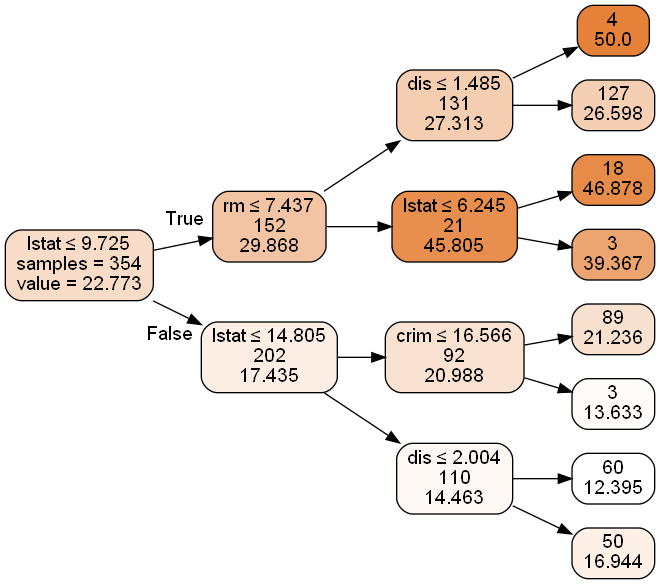

In [26]:
# visualize decision tree
print('Target: [{}]'.format(target))
plotDecisionTree(dt, feature_names=X_train.columns.to_list(),
        rotate=True)

In [27]:
# tree rules
print(tree.export_text(dt, 
    feature_names=X_train.columns.to_list()))

|--- lstat <= 9.72
|   |--- rm <= 7.44
|   |   |--- dis <= 1.48
|   |   |   |--- value: [50.00]
|   |   |--- dis >  1.48
|   |   |   |--- value: [26.60]
|   |--- rm >  7.44
|   |   |--- lstat <= 6.24
|   |   |   |--- value: [46.88]
|   |   |--- lstat >  6.24
|   |   |   |--- value: [39.37]
|--- lstat >  9.72
|   |--- lstat <= 14.81
|   |   |--- crim <= 16.57
|   |   |   |--- value: [21.24]
|   |   |--- crim >  16.57
|   |   |   |--- value: [13.63]
|   |--- lstat >  14.81
|   |   |--- dis <= 2.00
|   |   |   |--- value: [12.39]
|   |   |--- dis >  2.00
|   |   |   |--- value: [16.94]



In [28]:
# training summary
regressionSummary(y_train, dt.predict(X_train))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 3.8920
            Mean Absolute Error (MAE) : 3.0981
          Mean Percentage Error (MPE) : -3.8168
Mean Absolute Percentage Error (MAPE) : 15.7202


In [29]:
# test summary
regressionSummary(y_test, dt.predict(X_test))


Regression statistics

                      Mean Error (ME) : -0.4137
       Root Mean Squared Error (RMSE) : 5.0737
            Mean Absolute Error (MAE) : 3.9133
          Mean Percentage Error (MPE) : -7.8400
Mean Absolute Percentage Error (MAPE) : 20.8771


## Share Results